In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('crimes_against_women_2001-2014.csv')
data

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [7]:
data.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [10]:
def info_columns(data_):
    total_na = data_.isna().sum().sum()
    print("Dimensional:", data_.shape[0], "rows,", data_.shape[1], "columns")
    print("Total NA values: %d" %(total_na))
    print("%38s%10s%10s%10s" %("Column Name", "Data type", "#Distinct", "#NaN"))
    col_name = data_.columns
    dtype = data_.dtypes
    uniq = data_.nunique()
    
    for i in range(len(col_name)):
        print("%38s%10s%10s%10s" %(col_name[i], dtype[i], uniq[i], data_[col_name[i]].isna().sum()))

info_columns(data)

Dimensional: 10677 rows, 11 columns
Total NA values: 0
                           Column Name Data type #Distinct      #NaN
                            Unnamed: 0     int64      9017         0
                              STATE/UT    object        72         0
                              DISTRICT    object      1605         0
                                  Year     int64        14         0
                                  Rape     int64       481         0
              Kidnapping and Abduction     int64       555         0
                          Dowry Deaths     int64       283         0
Assault on women with intent to outrage her modesty     int64       649         0
            Insult to modesty of Women     int64       381         0
   Cruelty by Husband or his Relatives     int64       961         0
                  Importation of Girls     int64        37         0


Thực tế có 781 quận ở Ấn Độ -> fake data

Cột Unname:0 vô nghĩa

->> Break 2 cột này

In [13]:
data.drop(columns=['DISTRICT', 'Unnamed: 0'], axis=1, inplace=True)
data.rename(columns={'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                    'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                    'Insult to modesty of Women':'Insult_to_womens_modesty',
                    'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                    'Importation of Girls':'Importation_of_Girls'}, inplace = True)

In [14]:
data

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


## Check STATE columns

In [16]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [20]:
data['STATE/UT'] = data['STATE/UT'].str.lower()
data['STATE/UT'] = data['STATE/UT'].str.strip()

In [29]:
def check_state(data):
    states = data['STATE/UT'].unique()
    states.sort()
    print(states)
    print(len(states))
    
check_state(data)

In [31]:
data['STATE/UT'].replace({"a & n islands" : "a&n islands",
                          "d & n haveli": "d&n haveli",
                          "delhi ut" : "delhi"}, inplace=True)
check_state(data)

['a&n islands' 'andhra pradesh' 'arunachal pradesh' 'assam' 'bihar'
 'chandigarh' 'chhattisgarh' 'd&n haveli' 'daman & diu' 'delhi' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'lakshadweep' 'madhya pradesh' 'maharashtra'
 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab'
 'rajasthan' 'sikkim' 'tamil nadu' 'telangana' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal']
36


## Exploratory Analysis and Visualization


Count number of crimes against women

In [34]:
data.columns

Index(['STATE/UT', 'Year', 'Rape', 'Kidnapping_Abduction', 'Dowry_Deaths',
       'Hurting_of_womens_modesty', 'Insult_to_womens_modesty',
       'Domestic_Cruelty', 'Importation_of_Girls'],
      dtype='object')

In [38]:
total_population_of_victim_overall = 0
for column in data.columns:
    if column == 'STATE/UT' or column == 'Year':
        total_population_of_victim_overall = total_population_of_victim_overall
    else:
        total_population_of_victim_overall += data[column].sum()
        
total_population_of_victim_overall

5321610

Text(0, 0.5, 'Cases ofImportation of girls in India')

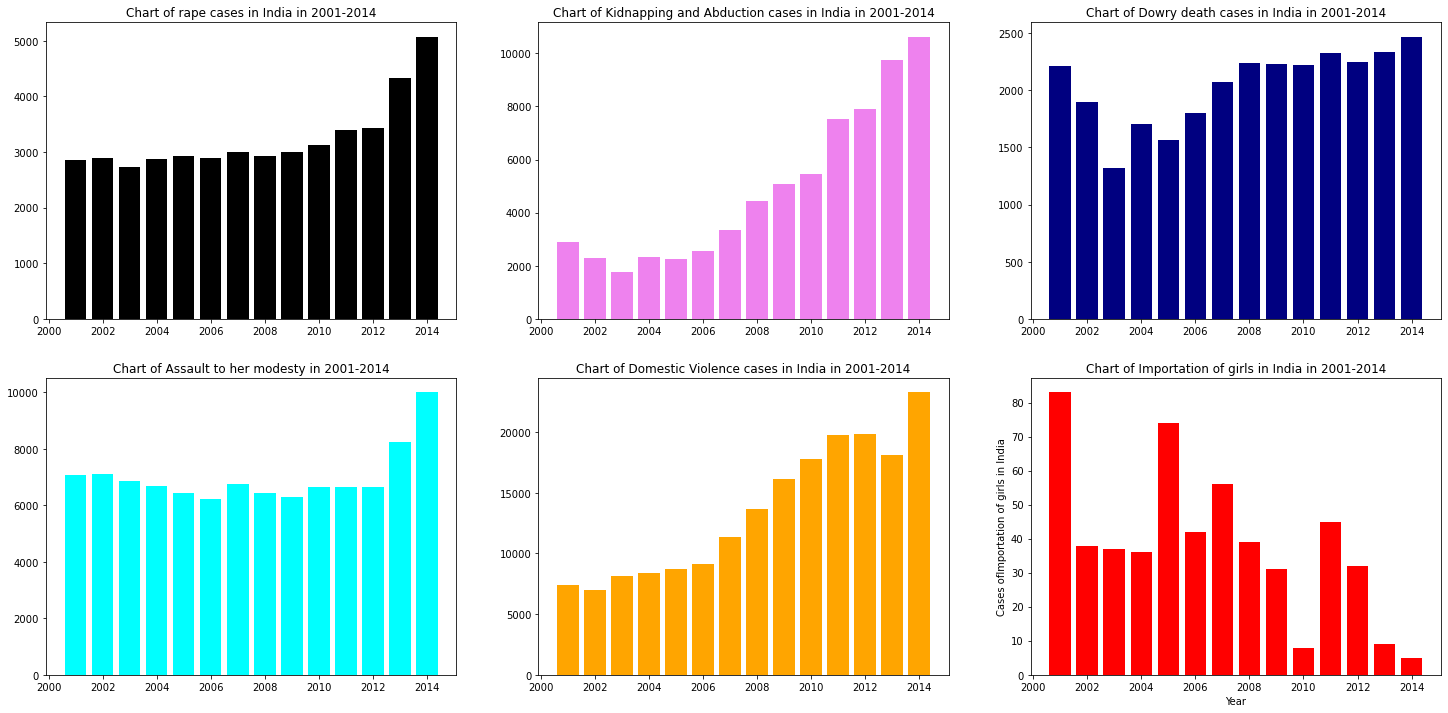

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(data.Year, data.Rape, color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(data.Year, data.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(data.Year, data.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(data.Year, data.Hurting_of_womens_modesty, color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(data.Year, data.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(data.Year, data.Importation_of_Girls, color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases ofImportation of girls in India') #Y-axis

Có thể thấy qua mỗi năm, số vụ tăng lên và đỉnh điểm là năm 2014

## Asking and Question

**Q . Create a dataframe containing 10 highest reported rape cases in India, in the span of year 2001-2014.**

In [48]:
max_rape_case = data.sort_values('Rape', ascending=False).head(10)
max_rape_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10244,madhya pradesh,2014,5076,5688,733,9609,429,6451,0
9426,madhya pradesh,2013,4335,2873,776,8252,736,4988,7
10445,rajasthan,2014,3759,4421,408,5999,18,15905,0
10595,uttar pradesh,2014,3467,10626,2469,8605,29,10471,0
10291,maharashtra,2014,3438,2457,279,10001,1575,7696,1
8611,madhya pradesh,2012,3425,1127,743,6655,774,3988,6
7810,madhya pradesh,2011,3406,1088,811,6665,762,3732,45
9628,rajasthan,2013,3285,4047,453,4829,25,15094,1
7025,madhya pradesh,2010,3135,1030,892,6646,918,3756,5
9472,maharashtra,2013,3063,1874,320,8132,2632,8542,0


**Q. Create a dataframe containing 10 highest reported deaths caused by Dowry cases in India, in the span of year 2001-2014.**

In [49]:
max_dowry_case = data.sort_values('Dowry_Deaths', ascending=False).head(10)
max_dowry_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
10595,uttar pradesh,2014,3467,10626,2469,8605,29,10471,0
9760,uttar pradesh,2013,3050,9737,2335,7303,25,8781,0
8132,uttar pradesh,2011,2042,7525,2322,3455,3,7121,0
8938,uttar pradesh,2012,1963,7910,2244,3247,8,7661,0
5796,uttar pradesh,2008,1871,4439,2237,2955,3374,8312,0
6563,uttar pradesh,2009,1759,5078,2232,2782,2524,8566,0
7342,uttar pradesh,2010,1563,5468,2217,2793,11,7978,0
650,uttar pradesh,2001,1958,2879,2211,2870,2575,7365,0
5040,uttar pradesh,2007,1648,3363,2076,2522,2882,7650,0
1366,uttar pradesh,2002,1415,2298,1893,2145,1887,5679,0


Duy nhất uttar pradesh xuất hiện -> Tình trạng Dowry_Deaths tại đây là cao nhất

**Q. Find out the total number of cases, in span of 2001-2014 under each category, state wise.**

In [50]:
case_by_state = data.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty', 'Importation_of_Girls']].sum()
case_by_state

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
a&n islands,336,212,20,288,0
andhra pradesh,32150,34504,13844,280906,34
arunachal pradesh,1316,1470,6,476,0
assam,40190,62074,3268,115300,22
bihar,30758,57086,32206,69770,904
chandigarh,770,1682,90,2080,0
chhattisgarh,29308,11808,2758,23436,12
d&n haveli,132,224,2,90,0
daman & diu,60,44,6,76,0
